Sales Analysis Project
Learning Pandas and diving deep into the data.

Importing libraries

In [73]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations

Merging (12) Months of CSV data saved locally

Time to concat to create a single csv file

In [74]:
# Specify the folder path containing the CSV files
folder_path = "/content/sales_data_csv"

# Create an empty list to store the DataFrames
all_data = []

# Iterate through each CSV file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Append the DataFrame to the list
        all_data.append(df)

# Combine all DataFrames into a single DataFrame
master_df = pd.concat(all_data, ignore_index=True)

# Save the combined DataFrame to a new master CSV file
master_df.to_csv("master_sales_data.csv", index=False)


Convert table into scrollable table

In [75]:
# Load the master CSV file into a DataFrame
df = pd.read_csv("master_sales_data.csv")

# Display the DataFrame in a scrollable table
from IPython.display import display
display(df)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


Code needs to be cleaned missing data fields.

In [76]:
# Attempt to convert "Order Date" to datetime, handling errors
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')

# Filter for rows with missing or invalid dates
invalid_dates_df = df[df["Order Date"].isnull()]

# Display the DataFrame with invalid dates in a scrollable table
from IPython.display import display
display(invalid_dates_df)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
198,NaN,NaN,NaN,NaN,NaT,NaN
574,NaN,NaN,NaN,NaN,NaT,NaN
776,NaN,NaN,NaN,NaN,NaT,NaN
1383,NaN,NaN,NaN,NaN,NaT,NaN
1436,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...
185868,NaN,NaN,NaN,NaN,NaT,NaN
185887,NaN,NaN,NaN,NaN,NaT,NaN
185960,NaN,NaN,NaN,NaN,NaT,NaN
186532,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address


Remove all missing rows associated with missing values.

In [77]:
# Attempt to convert "Order Date" to datetime, handling errors
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')

# Drop rows with any missing values
df.dropna(inplace=True)

from IPython.display import display
display(df)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


Adding a new column called Month

In [78]:
# Extract month from "Order Date" and add as a new column
df["Month"] = pd.to_datetime(df["Order Date"]).dt.month_name()

Adding a new  column called Sales

In [79]:
# Convert Quantity Ordered and Price Each to numeric before multiplying
try:
    df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], errors="coerce")
    df["Price Each"] = pd.to_numeric(df["Price Each"], errors="coerce")
except:
    print("Error converting columns to numeric. Please check data types.")

# Create "Sales" column with product of Quantity Ordered and Price Each
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

# Handle missing values
df.dropna(subset=["Sales"], inplace=True)

In [80]:
from IPython.display import display
display(df)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",September,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",September,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",September,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",September,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",September,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",June,2.99
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",June,149.99
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",June,11.95
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",June,11.95


Creating a column called month to the dataframe

In [81]:
# Ensure "Order Date" is a datetime type
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Add the "Month" column using dt.month_name()
df["Month"] = df["Order Date"].dt.month_name()

from IPython.display import display
display(df)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",September,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",September,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",September,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",September,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",September,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",June,2.99
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",June,149.99
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",June,11.95
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",June,11.95


Calculate all months sales

In [82]:
# Group by month and sum sales
monthly_sales = df.groupby("Month")["Sales"].sum()

# Create a categorical index with months in order
month_names = pd.CategoricalIndex(pd.to_datetime(['2023-' + month for month in ['01', '02', '03', '04', '05', '06',
                                                      '07', '08', '09', '10', '11', '12']]).month_name())

# Reindex the monthly sales with the ordered categorical index
monthly_sales = monthly_sales.reindex(month_names)

# Display the monthly sales in a scrollable table
display(monthly_sales)

January      1822256.73
February     2202022.42
March        2807100.38
April        3390670.24
May          3152606.75
June         2577802.26
July         2647775.76
August       2244467.88
September    2097560.13
October      3736726.88
November     3199603.20
December     4613443.34
Name: Sales, dtype: float64

Making new column for city/state

In [83]:
# Extract city and state from "Purchase Address" using a custom function
def extract_city_state(address):
    parts = address.split(", ")
    return parts[1] + ", " + parts[2].split(" ")[0]  # Combine city and state with a comma

df["City"] = df["Purchase Address"].apply(extract_city_state)

from IPython.display import display
display(df)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",September,15.36,"Los Angeles, CA"
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",September,23.90,"Austin, TX"
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",September,11.95,"Los Angeles, CA"
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",September,149.99,"Seattle, WA"
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",September,11.95,"Atlanta, GA"
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",June,2.99,"Boston, MA"
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",June,149.99,"New York City, NY"
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",June,11.95,"San Francisco, CA"
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",June,11.95,"San Francisco, CA"


City and State Table with Quantity Ordered, Prices Each & Sales

In [84]:
# Group by city and sum the desired columns
city_sales = df.groupby("City")[["Quantity Ordered", "Price Each", "Sales"]].sum().sort_values("Sales", ascending=False)

# Display the results in a scrollable table
display(city_sales)

,Quantity Ordered,Price Each,Sales
City,,,
"San Francisco, CA",50239,8211461.74,8262203.91
"Los Angeles, CA",33289,5421435.23,5452570.80
"New York City, NY",27932,4635370.83,4664317.43
"Boston, MA",22528,3637409.77,3661642.01
"Atlanta, GA",16602,2779908.20,2795498.58
"Dallas, TX",16730,2752627.82,2767975.40
"Seattle, WA",16553,2733296.01,2747755.48
"Portland, OR",11303,1860558.22,1870732.34
"Austin, TX",11153,1809873.61,1819581.75


Making a new column called time to the dataframe/chart in a 24 hour period

In [85]:
# Extract time in 24-hour format and create the "Time" column
df["Time"] = pd.to_datetime(df["Order Date"]).dt.strftime("%H:%M:%S")

from IPython.display import display
display(df)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",September,15.36,"Los Angeles, CA",14:44:00
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",September,23.90,"Austin, TX",10:19:00
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",September,11.95,"Los Angeles, CA",17:48:00
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",September,149.99,"Seattle, WA",07:52:00
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",September,11.95,"Atlanta, GA",19:03:00
...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",June,2.99,"Boston, MA",19:02:00
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",June,149.99,"New York City, NY",19:29:00
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",June,11.95,"San Francisco, CA",18:57:00
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",June,11.95,"San Francisco, CA",18:35:00


Finds all the duplicate ORDER IDs


In [86]:
# Find duplicate "Order ID" values
duplicate_orders = df[df["Order ID"].duplicated(keep=False)]  # Keep all duplicates

# Count the number of duplicate "Order ID" values
num_duplicates = len(duplicate_orders)

# Print the number of duplicates
print("Number of duplicate Order IDs:", num_duplicates)

# Display the duplicate orders in a table
display(duplicate_orders)



Number of duplicate Order IDs: 14649


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
20,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",September,11.95,"New York City, NY",15:06:00
21,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",September,11.95,"New York City, NY",15:06:00
60,248210,iPhone,1,700.00,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",September,700.00,"San Francisco, CA",10:33:00
61,248210,Lightning Charging Cable,1,14.95,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",September,14.95,"San Francisco, CA",10:33:00
70,248219,Bose SoundSport Headphones,1,99.99,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",September,99.99,"Los Angeles, CA",12:48:00
...,...,...,...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",June,3.84,"Los Angeles, CA",11:37:00
186822,222884,Google Phone,1,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",June,600.00,"New York City, NY",12:06:00
186823,222884,USB-C Charging Cable,1,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",June,11.95,"New York City, NY",12:06:00
186842,222903,iPhone,1,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",June,700.00,"New York City, NY",22:21:00


Find duplicate Order IDs then group products

In [87]:
# Group products by "Order ID" within the duplicate orders DataFrame
grouped_products = duplicate_orders.groupby("Order ID")["Product"].apply(list)

# Display the grouped products
display(grouped_products.to_frame(name="Products"))


,Products
Order ID,
141275,"[USB-C Charging Cable, Wired Headphones]"
141290,"[Apple Airpods Headphones, AA Batteries (4-pack)]"
141365,"[Vareebadd Phone, Wired Headphones]"
141384,"[Google Phone, USB-C Charging Cable]"
141450,"[Google Phone, Bose SoundSport Headphones]"
...,...
319536,"[Macbook Pro Laptop, Wired Headphones]"
319556,"[Google Phone, Wired Headphones]"
319584,"[iPhone, Wired Headphones]"


In [88]:
# Count the occurrences of each product combination
product_combination_counts = grouped_products.value_counts()  # Create the missing variable

# Show only the top 10 combinations and their counts
formatted_output = product_combination_counts.head(10).to_string(header=False, index=True)

# Wrap text within cells for visual clarity
formatted_output = formatted_output.replace("[", " ").replace("]", " ")

# Display the formatted results
print(formatted_output)

 iPhone, Lightning Charging Cable                         882
 Google Phone, USB-C Charging Cable                       856
 iPhone, Wired Headphones                                 361
 Vareebadd Phone, USB-C Charging Cable                    312
 Google Phone, Wired Headphones                           303
 iPhone, Apple Airpods Headphones                         286
 Google Phone, Bose SoundSport Headphones                 161
 Vareebadd Phone, Wired Headphones                        104
 Google Phone, USB-C Charging Cable, Wired Headphones      77
 Vareebadd Phone, Bose SoundSport Headphones               60


Reverse previous code to find each product directly and count them

In [89]:
# Count the occurrences of each product directly
product_counts = df["Product"].value_counts()

# Display the top 10 products and their counts
print(product_counts.head(10))

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
Name: Product, dtype: int64


***Questions that need to be answered!***

Question #1: What was the best month for sales?

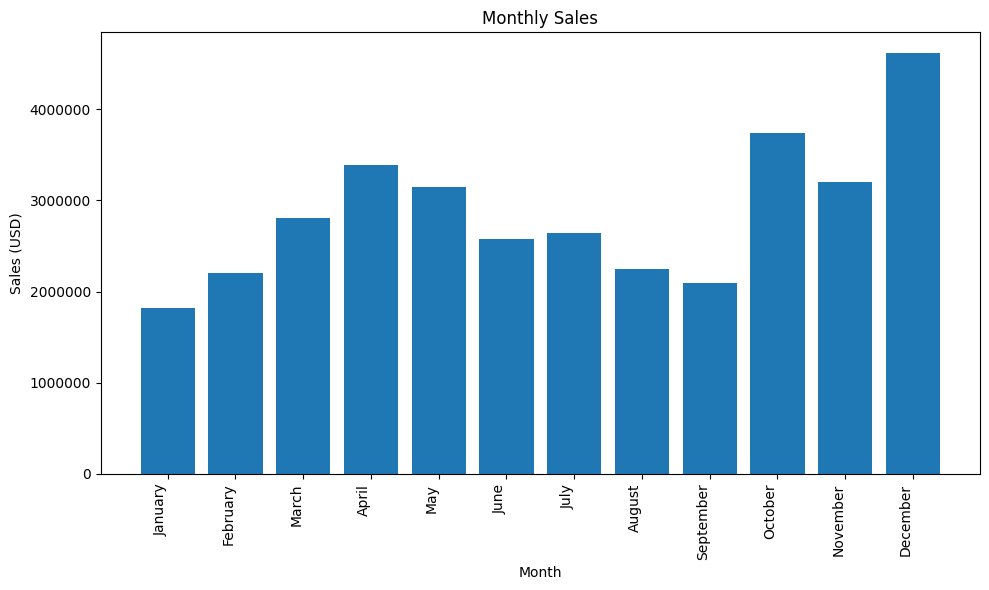

In [90]:
# Group by month and sum sales
monthly_sales = df.groupby("Month")["Sales"].sum()

# Create a categorical index with months in order
month_names = pd.CategoricalIndex(pd.to_datetime(['2023-' + month for month in ['01', '02', '03', '04', '05', '06',
                                                                                '07', '08', '09', '10', '11', '12']]).month_name())
monthly_sales = monthly_sales.reindex(month_names)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Sales (USD)")
plt.title("Monthly Sales")
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels vertically
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Question #2: What city sold the most product?

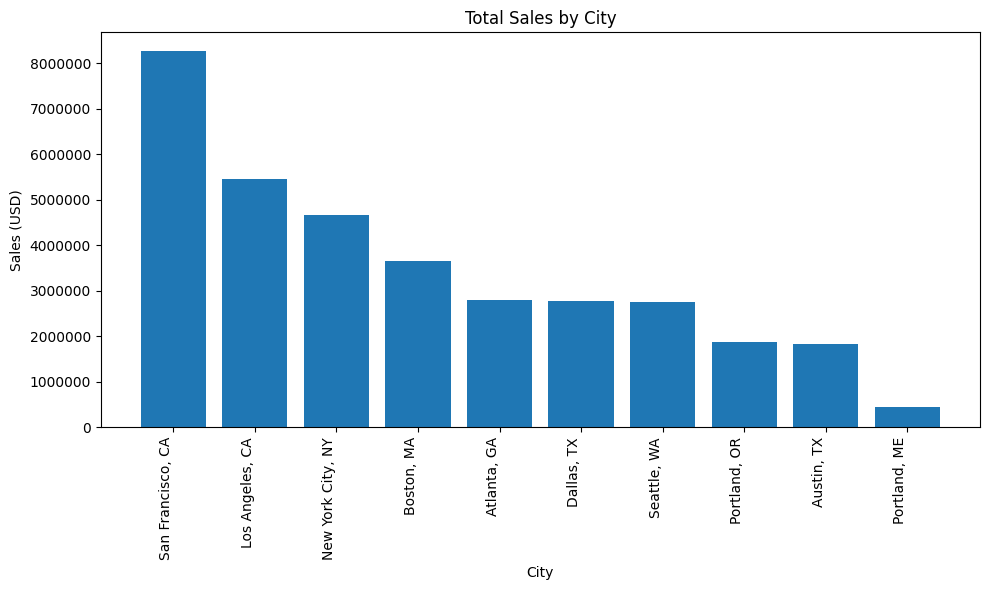

In [91]:
# Group by city and sum the sales
city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(city_sales.index, city_sales.values)
plt.xlabel("City")
plt.ylabel("Sales (USD)")
plt.title("Total Sales by City")
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels vertically
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Question #3: What time should we display advertisements to maximize the likelihood of purchases?

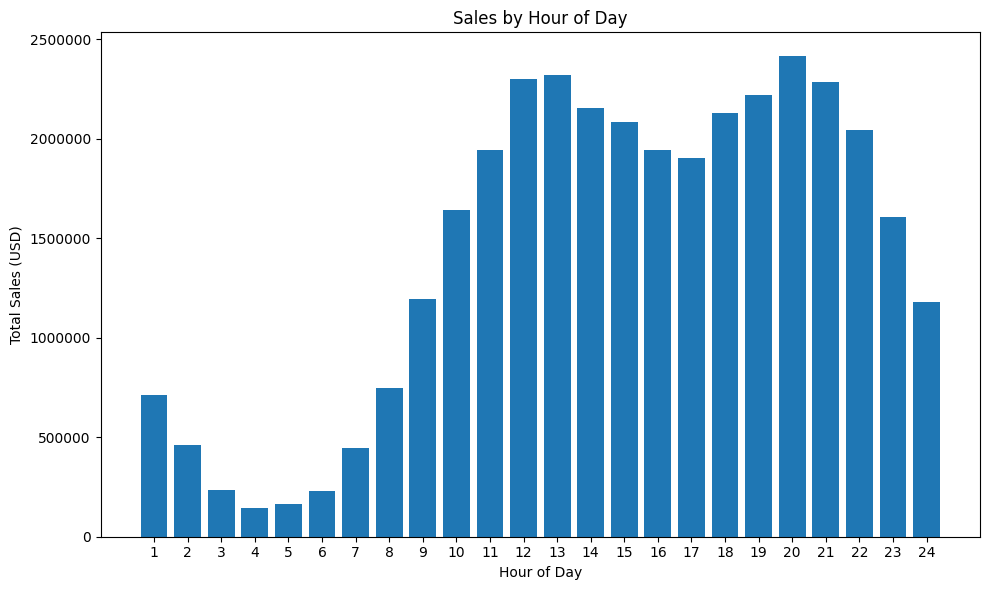

In [92]:
# Convert "Time" to Datetime
df["Time"] = pd.to_datetime(df["Time"])

# Extract the hour from the "Time" column and group sales by hour
sales_by_hour = df.groupby(df["Time"].dt.hour)["Sales"].sum()

# Create the bar chart with USD formatting and 1-based hour labels
plt.figure(figsize=(10, 6))
plt.bar(sales_by_hour.index + 1, sales_by_hour.values)  # Shift x-axis values for 1-based hours
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales (USD)")
plt.title("Sales by Hour of Day")
plt.xticks(range(1, 25))  # Set x-axis ticks from 1 to 24
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis
plt.tight_layout()
plt.show()

Question #4: What products are most often sold together?

In [93]:
# Show only the top 10 combinations and their counts
formatted_output = product_combination_counts.head(10).to_string(header=False, index=True)

# Wrap text within cells for visual clarity
formatted_output = formatted_output.replace("[", " ").replace("]", " ")

# Display the formatted results
print(formatted_output)

 iPhone, Lightning Charging Cable                         882
 Google Phone, USB-C Charging Cable                       856
 iPhone, Wired Headphones                                 361
 Vareebadd Phone, USB-C Charging Cable                    312
 Google Phone, Wired Headphones                           303
 iPhone, Apple Airpods Headphones                         286
 Google Phone, Bose SoundSport Headphones                 161
 Vareebadd Phone, Wired Headphones                        104
 Google Phone, USB-C Charging Cable, Wired Headphones      77
 Vareebadd Phone, Bose SoundSport Headphones               60


Question #5: What product sold the most? Why do you think it did?

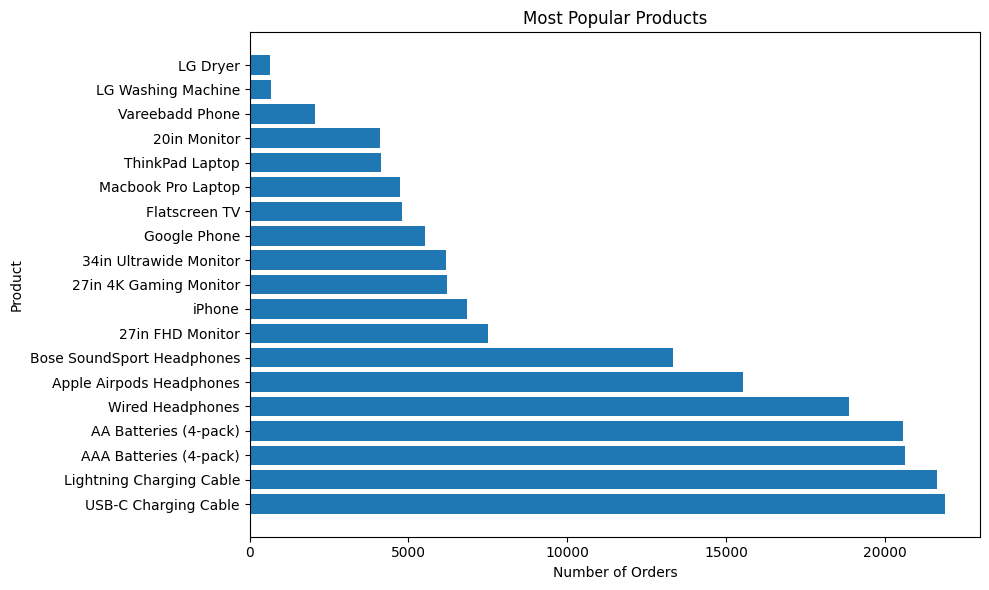

In [94]:
# Count product occurrences
product_counts = df["Product"].value_counts()

# Create the bar chart with vertical product names
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(product_counts.index, product_counts.values)  # Use barh for horizontal bars
plt.xlabel("Number of Orders")
plt.ylabel("Product")
plt.title("Most Popular Products")
plt.tight_layout()
plt.show()